# Python fundamentals part 2
- error handling
    - try - except
    - different types of error
- file handling
- functions
- matplotlib
- numpy


### Error handling
- syntax error
- runtime error (exceptions)
- logical errors


##### syntax errors
- easy to fix

In [1]:
prin("linear regression is a supervised learning algorithm")


NameError: name 'prin' is not defined

In [2]:
print("linear regression is a supervised learning algorithm")

linear regression is a supervised learning algorithm


##### runtime error
- easy to fix

In [7]:
# [0,1,2,3,4]
numbers = list(range(5))

numbers[5]

IndexError: list index out of range

##### logical error
- can be hard to detect
- harder to find as the code runs
- some extensive debugging could be involved here

In [9]:
import numpy as np
radius = 5
# circle area is actually pi*r^2
circle_area = np.pi*radius # kommer ge ett felaktigt resultat
print(f"{circle_area = :.2f} area units") 

circle_area = 15.71 area units


##### try except


In [10]:
age = float(input("Enter your age: "))
print(age)

48.0


In [12]:
age = float(input("Enter your age: "))
if not 0 <= age <= 125:
    raise ValueError(f"You entered {age}, age must be between 0 and 125")


ValueError: You entered 1235.0, age must be between 0 and 125

In [ ]:
while True:
    try:
        age = float(input("Enter your age: "))
        if not 0 <= age <= 125:
            raise ValueError(f"You entered {age},age must be between 0 and 125")
        print(f"You are {age} years old")
        break
    except ValueError as err:
        print(err)

##### Functions
- reuse code
- organize code
- increase readability
- modular code
- DRY - dont repeat yourself
- break down complex program into smaler parts

def name(param1,param2...):
statements
...
name(arg1,arg2...)

In [22]:
# number is input parameter
def cuber(number):
    return number**3
# call the function cuber with input argument 2
cuber(6)

216

In [27]:
cubes = [cuber(number) for number in range(6)]
cubes

[0, 1, 8, 27, 64, 125]

In [29]:
def squarer(x): # input parameter x 
    return x**2 # returns x**2

print(squarer(3))
squares = [squarer(x) for x in range(10)]
print(squares)

9
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


#### Default value

In [44]:
for i in range(1, 5 +1):
    print(i*"x ")
    

x 
x x 
x x x 
x x x x 
x x x x x 


In [45]:
# void function - returns None, but has a side effect by printing
def draw_ascii_triangle(numbers_rows=5):
    for i in range(1, numbers_rows+1):
        print(i*"x ")

draw_ascii_triangle()

x 
x x 
x x x 
x x x x 
x x x x x 


In [46]:
# 10 overwrites the default value of 5
draw_ascii_triangle(10)

x 
x x 
x x x 
x x x x 
x x x x x 
x x x x x x 
x x x x x x x 
x x x x x x x x 
x x x x x x x x x 
x x x x x x x x x x 


In [55]:
# number_rows = 5 is a default value
def draw_ascii_pattern(number_rows=5):
    for i in range(1,number_rows + 1):
        print(i * "x " + (number_rows - i) * "o ")

draw_ascii_pattern()
draw_ascii_pattern(2)
draw_ascii_pattern(4)


x o o o o 
x x o o o 
x x x o o 
x x x x o 
x x x x x 
x o 
x x 
x o o o 
x x o o 
x x x o 
x x x x 


In [58]:
def smallest(number1, number2):
    if number1 > number2:
        return number2
    return number1
smallest(7,2)

2

### Arbitrary arguments, *args
- arbitrary number of positional arguments

In [59]:
def average(*numbers):
    sum_ = 0
    for number in numbers:
        sum_ += number

    return sum_/len(numbers)

# (1+2+3)/3
average(1,2,3)


2.0

In [60]:
average(1,2,34,5,12,51,23,34)

20.25

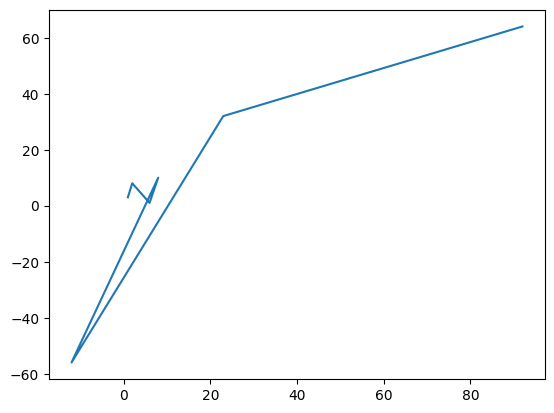

In [8]:
import matplotlib.pyplot as plt
import numpy as np

xpoint = np.array([1,2,6,8,-12,23,92])
ypoint = np.array([3,8,1,10,-56,32,64])
#plt.plot(xpoint,ypoint, "o")
plt.plot(xpoint,ypoint)
plt.show()